# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df.shape

(614, 13)

In [34]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [35]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [39]:
percentage_with_credit_history = (df[df['Credit_History'] == 1].shape[0] / df.shape[0]) * 100

print(percentage_with_credit_history)

77.36156351791531


In [40]:
df['Credit_History'].isnull().sum()

50

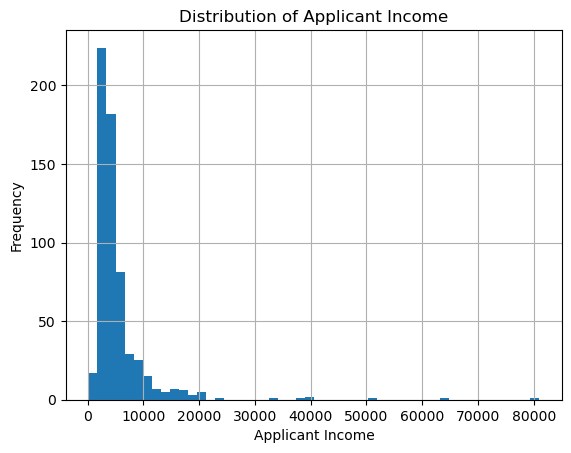

In [41]:
# Applicant income distribution histogram
df['ApplicantIncome'].hist(bins=50)

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

In [42]:
## The applicant income is skewed to the right as expected since many people applying for loans
## May have lower income and are in need of a loan 

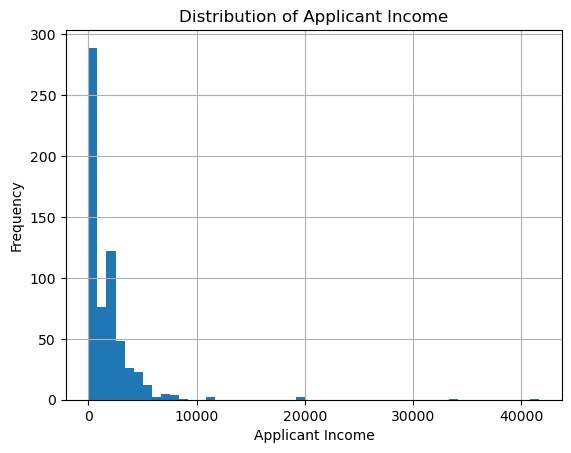

In [43]:
# Applicant income distribution histogram
df['CoapplicantIncome'].hist(bins=50)

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

In [44]:
## The Coapplicant income is skewed to the right as well. With majority of coapplicants having 0 income

In [45]:

mean_applicant_income = df['ApplicantIncome'].mean()
median_applicant_income = df['ApplicantIncome'].median()

mean_coapplicant_income = df['CoapplicantIncome'].mean()
median_coapplicant_income = df['CoapplicantIncome'].median()


print("ApplicantIncome - Mean:", mean_applicant_income, " Median:", median_applicant_income)
print("CoapplicantIncome - Mean:", mean_coapplicant_income, " Median:", median_coapplicant_income)

ApplicantIncome - Mean: 5403.459283387622  Median: 3812.5
CoapplicantIncome - Mean: 1621.2457980271008  Median: 1188.5


In [46]:
#In both cases the mean is larger then the median indicating that the data is skewed to the right 

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [47]:
df_cat = df[['Loan_ID','Education','Married','Self_Employed','Gender','Loan_Status','Dependents','Property_Area','Credit_History']]

In [48]:
for column in df_cat.columns:
    unique_values = df_cat[column].unique()
    print(column, ":", unique_values)

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [49]:
for column in df_cat.columns:
    if column != 'Loan_ID':
        frequencies = df_cat[column].value_counts()
        print("Frequency of", column)
        print(frequencies)
        print()

Frequency of Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



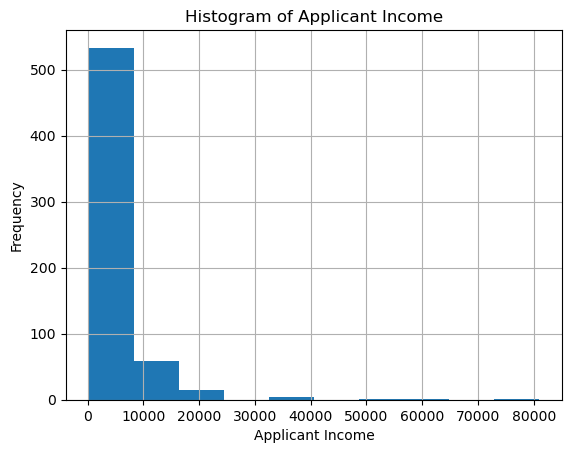

In [50]:
df['ApplicantIncome'].hist(bins=10)  # Change the number of bins as desired

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()

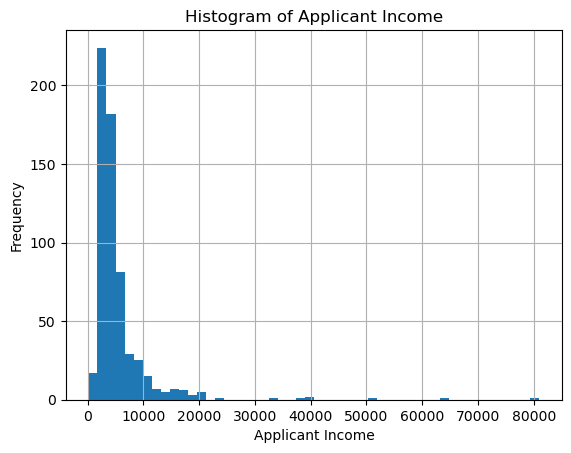

In [51]:
df['ApplicantIncome'].hist(bins=50)  # Change the number of bins as desired

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()

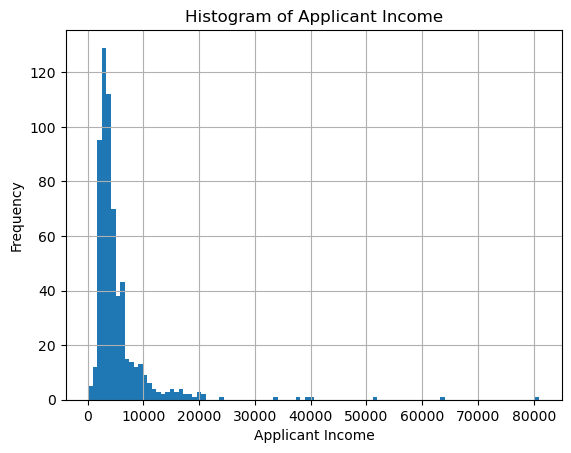

In [52]:
df['ApplicantIncome'].hist(bins=100)  # Change the number of bins as desired

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()

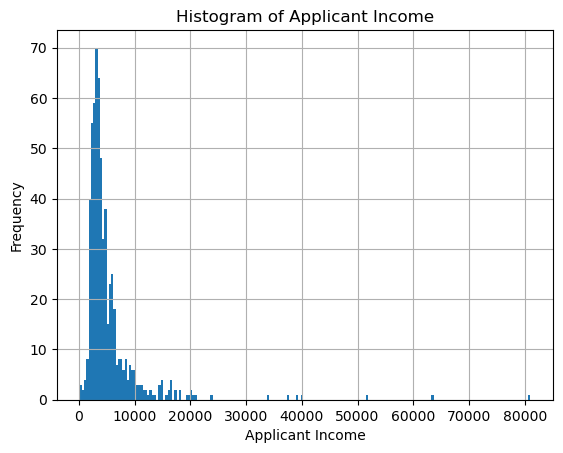

In [53]:
df['ApplicantIncome'].hist(bins=200)  # Change the number of bins as desired

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()

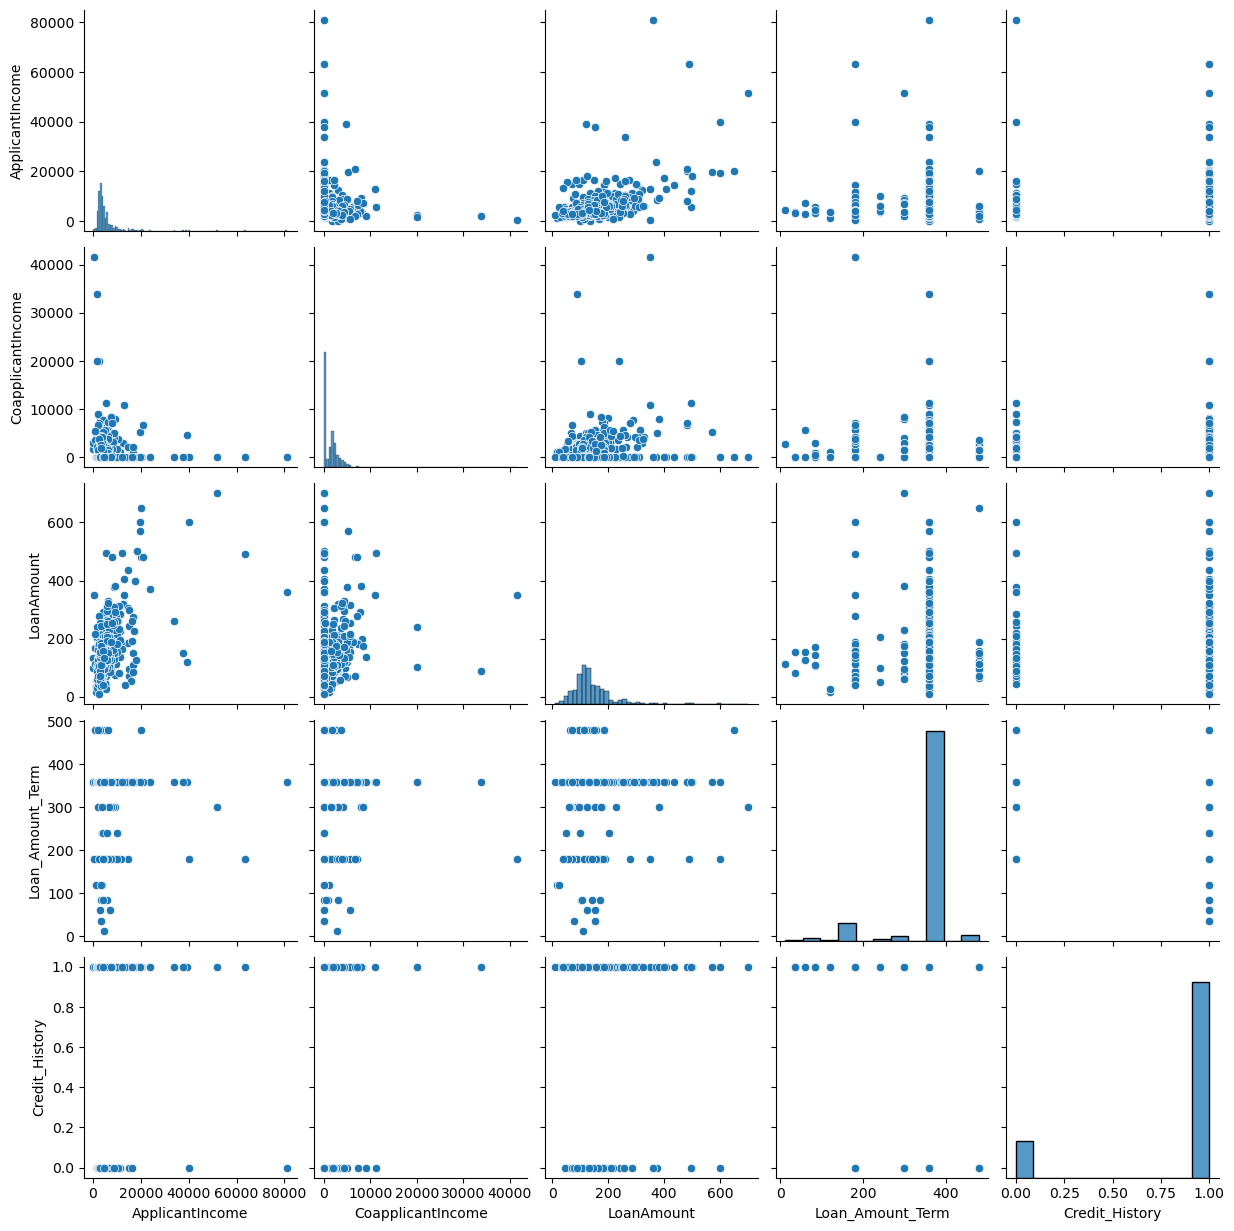

In [54]:
sns.pairplot(df)

In [55]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Look at box plots to understand the distributions. 

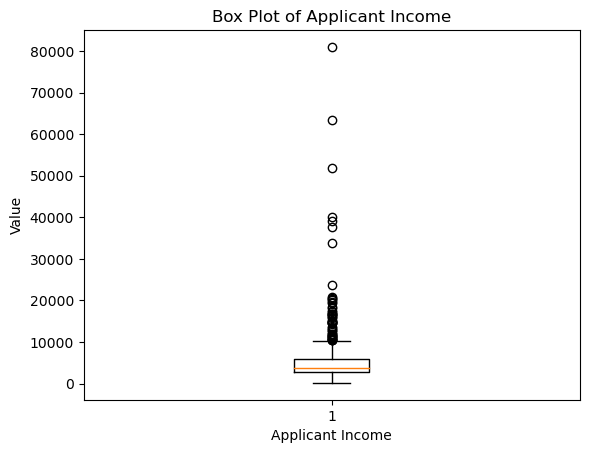

In [56]:
# Assuming you have already loaded your DataFrame as df
plt.boxplot(df['ApplicantIncome'])

plt.xlabel('Applicant Income')
plt.ylabel('Value')
plt.title('Box Plot of Applicant Income')
plt.show()

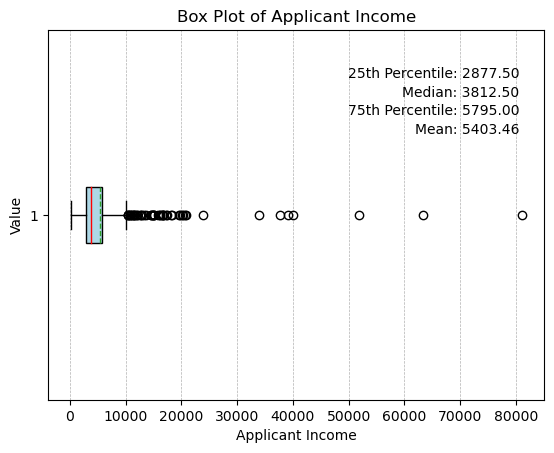

In [57]:
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame as df
plt.boxplot(df['ApplicantIncome'], vert=False, showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.xlabel('Applicant Income')
plt.ylabel('Value')
plt.title('Box Plot of Applicant Income')

# Add quartile labels
quartiles = df['ApplicantIncome'].quantile([0.25, 0.5, 0.75])
plt.text(0.95, 0.90, f"25th Percentile: {quartiles[0.25]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f"Median: {quartiles[0.5]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.80, f"75th Percentile: {quartiles[0.75]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')

# Add mean label
mean = df['ApplicantIncome'].mean()
plt.text(0.95, 0.75, f"Mean: {mean:.2f}", transform=plt.gca().transAxes, ha='right', va='top')

# Add grid lines
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

plt.show()

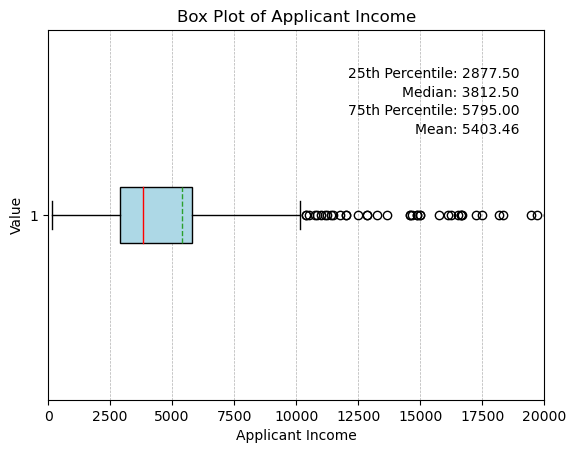

In [58]:
plt.boxplot(df['ApplicantIncome'], vert=False, showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.xlabel('Applicant Income')
plt.ylabel('Value')
plt.title('Box Plot of Applicant Income')

# Set x-axis limits
plt.xlim(0, 20000)

# Add quartile labels
quartiles = df['ApplicantIncome'].quantile([0.25, 0.5, 0.75])
plt.text(0.95, 0.90, f"25th Percentile: {quartiles[0.25]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f"Median: {quartiles[0.5]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.80, f"75th Percentile: {quartiles[0.75]:.2f}", transform=plt.gca().transAxes, ha='right', va='top')

# Add mean label
mean = df['ApplicantIncome'].mean()
plt.text(0.95, 0.75, f"Mean: {mean:.2f}", transform=plt.gca().transAxes, ha='right', va='top')

# Add grid lines
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

plt.show()

Look at the histogram and boxplot of LoanAmount

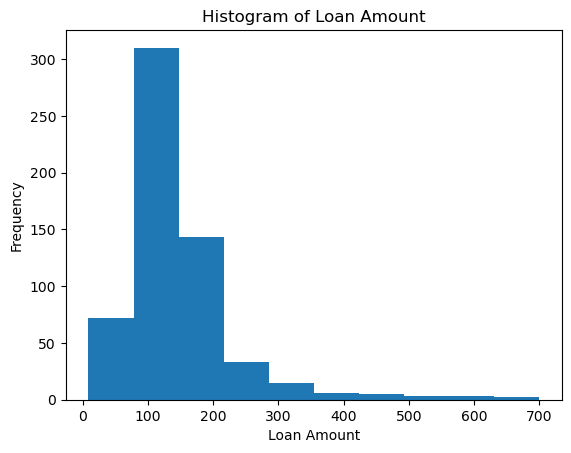

In [59]:
plt.hist(df['LoanAmount'].dropna(), bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')

plt.show()

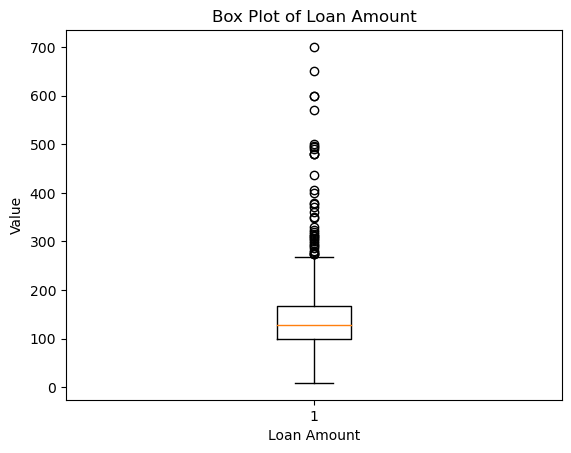

In [60]:

# Assuming you have already loaded your DataFrame as df
plt.boxplot(df['LoanAmount'].dropna())
plt.xlabel('Loan Amount')
plt.ylabel('Value')
plt.title('Box Plot of Loan Amount')

plt.show()


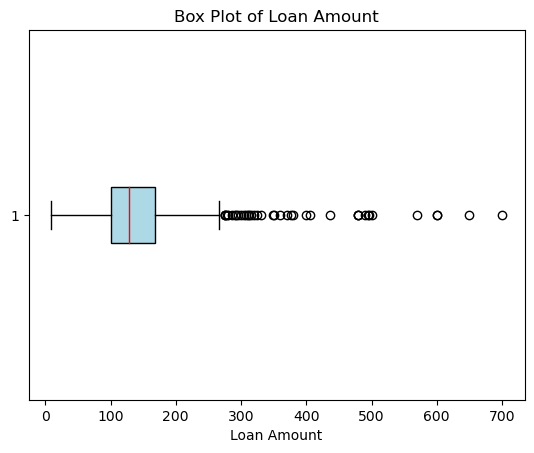

In [61]:
boxprops = dict(facecolor='lightblue')
medianprops = dict(color='red')
whiskerprops = dict(color='black')
capprops = dict(color='black')

plt.boxplot(df['LoanAmount'].dropna(), vert=False, showfliers=True,
            boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops,
            patch_artist=True)

plt.xlabel('Loan Amount')
plt.title('Box Plot of Loan Amount')

plt.show()

Look at the distribution of income segregated  by `Education`

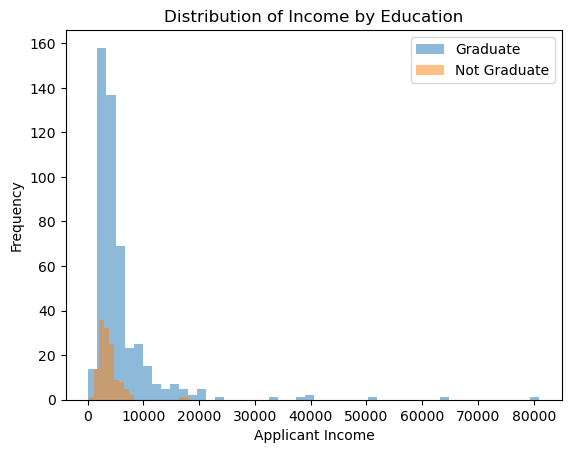

In [62]:
# Filter the data based on education categories
df_graduate = df[df['Education'] == 'Graduate']
df_not_graduate = df[df['Education'] == 'Not Graduate']

# Plot overlapping histograms
plt.hist(df_graduate['ApplicantIncome'].dropna(), bins=50, alpha=0.5, label='Graduate')
plt.hist(df_not_graduate['ApplicantIncome'].dropna(), bins=20, alpha=0.5, label='Not Graduate')

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income by Education')
plt.legend()

plt.show()

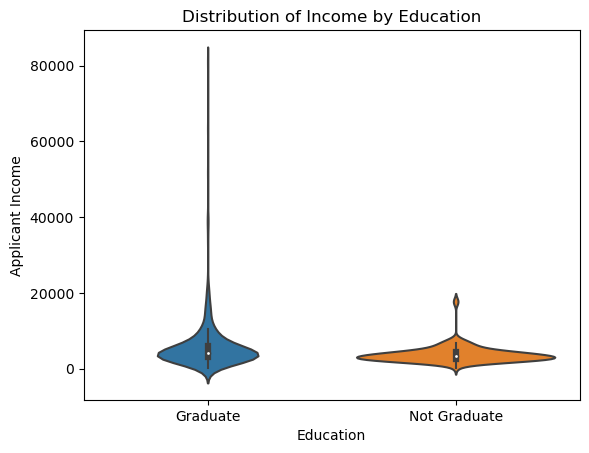

In [63]:
import seaborn as sns
# Create a violin plot
sns.violinplot(x='Education', y='ApplicantIncome', data=df)

plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Distribution of Income by Education')

plt.show()

In [64]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
cat_cols = df[['Gender','Married','Dependents', 'Education','Self_Employed','Credit_History','Property_Area']]

In [67]:
# Loop through each categorical variable
for col in cat_cols:
    # Create a pivot table to calculate counts and percentages
    pivot_table = pd.pivot_table(df, values='Loan_ID', index=col, columns='Loan_Status', aggfunc='count',
                                 fill_value=0, margins=True, margins_name='Total')
    
    # Calculate percentages
    pivot_table['% Approved'] = pivot_table['Y'] / pivot_table['Total'] * 100
    pivot_table['% Not Approved'] = pivot_table['N'] / pivot_table['Total'] * 100
    
    # Print the results
    print(f"Approvals by {col}:")
    print(pivot_table)
    print('\n')

Approvals by Gender:
Loan_Status    N    Y  Total  % Approved  % Not Approved
Gender                                                  
Female        37   75    112   66.964286       33.035714
Male         150  339    489   69.325153       30.674847
Total        187  414    601   68.885191       31.114809


Approvals by Married:
Loan_Status    N    Y  Total  % Approved  % Not Approved
Married                                                 
No            79  134    213   62.910798       37.089202
Yes          113  285    398   71.608040       28.391960
Total        192  419    611   68.576105       31.423895


Approvals by Dependents:
Loan_Status    N    Y  Total  % Approved  % Not Approved
Dependents                                              
0            107  238    345   68.985507       31.014493
1             36   66    102   64.705882       35.294118
2             25   76    101   75.247525       24.752475
3+            18   33     51   64.705882       35.294118
Total        186

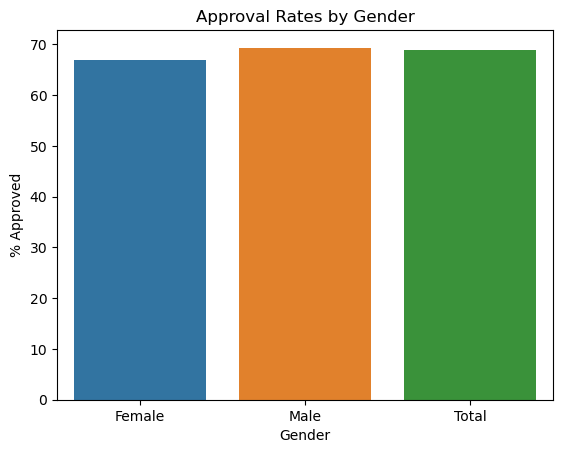

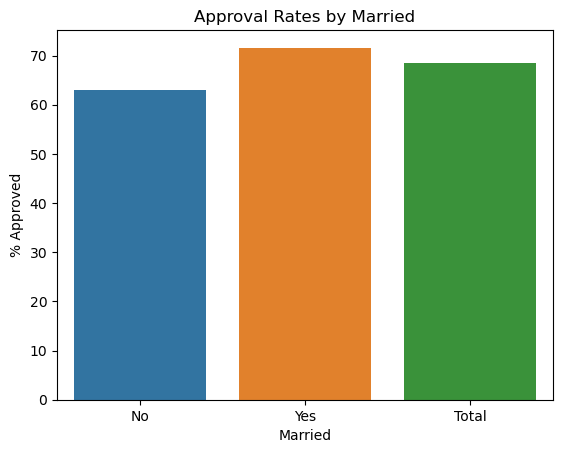

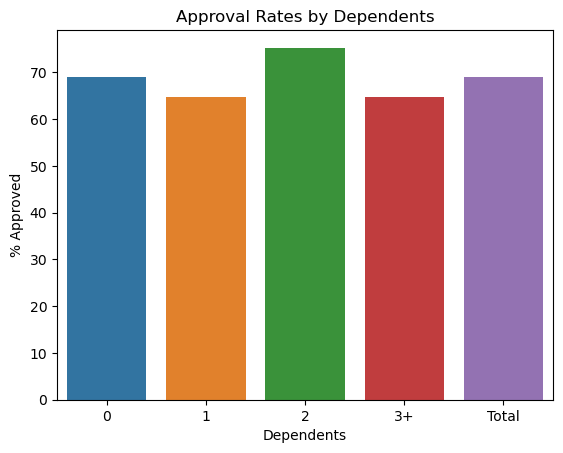

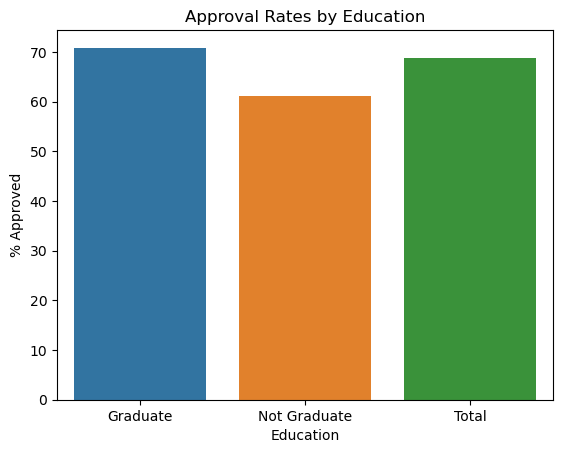

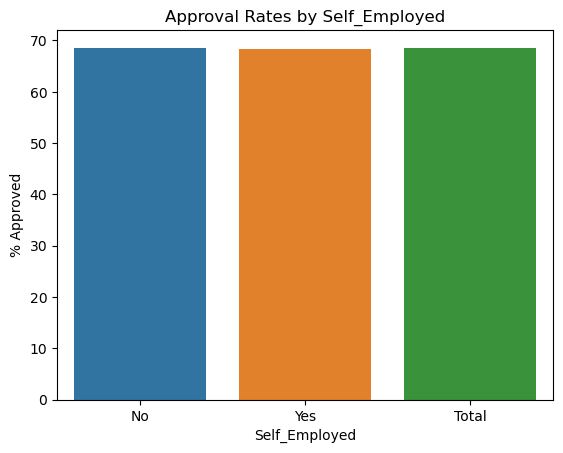

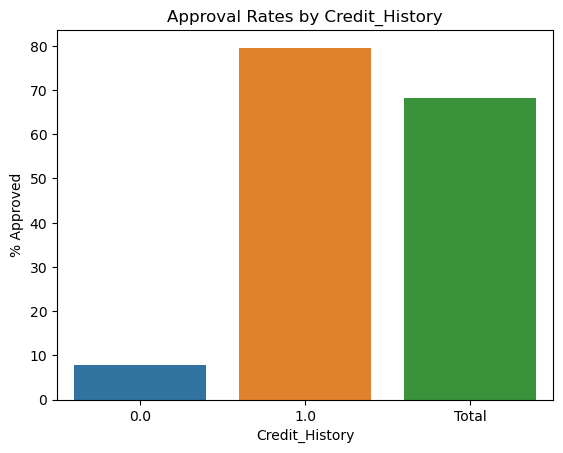

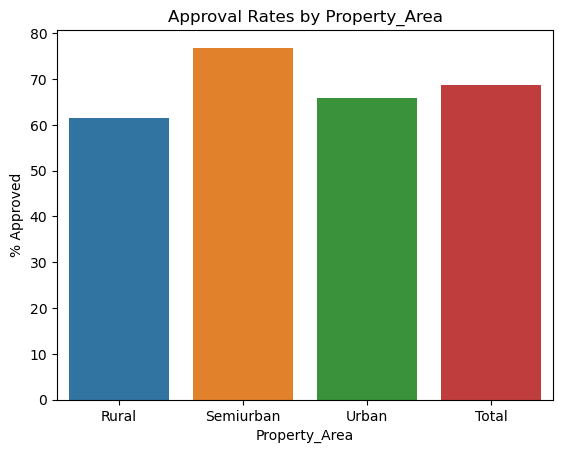

In [68]:

# List to store pivot tables
pivot_tables = []

# Loop through each categorical variable
for col in cat_cols:
    # Create a pivot table to calculate counts and percentages
    pivot_table = pd.pivot_table(df, values='Loan_ID', index=col, columns='Loan_Status', aggfunc='count',
                                 fill_value=0, margins=True, margins_name='Total')
    
    # Calculate percentages
    pivot_table['% Approved'] = pivot_table['Y'] / pivot_table['Total'] * 100
    pivot_table['% Not Approved'] = pivot_table['N'] / pivot_table['Total'] * 100
    
    # Reset the index of the pivot table
    pivot_table = pivot_table.reset_index()
    
    # Add pivot table to the list
    pivot_tables.append(pivot_table)

# Visualize pivot tables
for pivot_table in pivot_tables:
    # Approval rates by the categorical variable
    sns.barplot(x=pivot_table.columns[0], y='% Approved', data=pivot_table)
    plt.title(f"Approval Rates by {pivot_table.columns[0]}")
    plt.xlabel(pivot_table.columns[0])
    plt.ylabel('% Approved')
    plt.show()


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [69]:
df_clean = df.copy()

In [70]:
df_clean.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
df_cat.columns

Index(['Loan_ID', 'Education', 'Married', 'Self_Employed', 'Gender',
       'Loan_Status', 'Dependents', 'Property_Area', 'Credit_History'],
      dtype='object')

In [72]:
## For the Gender and Self-employed, and Dependents column replace null values with mode.

cols = df_clean[['Gender','Self_Employed','Dependents']]

for i in cols:
    df_clean[i].fillna(df_clean[i].mode().iloc[0], inplace=True)



In [73]:
df_clean.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
## If Coapplicant is zero than replace nan with not married and vice versa 

# Replace null values in 'Married' column based on 'CoapplicantIncome'
df_clean['Married'] = df_clean.apply(lambda row: 'No' if pd.isnull(row['Married']) and row['CoapplicantIncome'] == 0 else 'Yes' if pd.isnull(row['Married']) else row['Married'], axis=1)

In [75]:
df_clean.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
#numeric columns with nan values
numeric_cols = df_clean[['LoanAmount','Loan_Amount_Term','Credit_History']]

for column in numeric_cols.columns:
    unique_values = numeric_cols[column].unique()
    print(column, ":", unique_values)


LoanAmount : [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243.
  40. 250. 311. 400. 161. 196. 324. 157. 145. 181.  26. 211.   9

In [77]:
## From the Loan amount term group them by loan amount and get the median for each group
# use this median to fill the Loan_amount_term


# Calculate the median loan term for each loan amount category
median_loan_term_by_amount = df_clean.groupby('LoanAmount')['Loan_Amount_Term'].median()

# Fill the null values based on the loan amount
df_clean['Loan_Amount_Term'] = df_clean.apply(lambda row: median_loan_term_by_amount[row['LoanAmount']] if pd.isnull(row['Loan_Amount_Term']) else row['Loan_Amount_Term'], axis=1)

In [78]:
# For null values in loan amount group by the loan term and get the mean to replace nulls

# Calculate the mean loan amount for each loan term category
mean_loan_amount_by_term = df_clean.groupby('Loan_Amount_Term')['LoanAmount'].mean()

# Fill the null values based on the loan term
df_clean['LoanAmount'] = df_clean.apply(lambda row: mean_loan_amount_by_term[row['Loan_Amount_Term']] if pd.isnull(row['LoanAmount']) else row['LoanAmount'], axis=1)

In [79]:
df_clean.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df_clean['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [81]:
mode_credit_history = df_clean['Credit_History'].mode()[0]  # Calculate the mode of 'Credit_History'

df_clean['Credit_History'].fillna(mode_credit_history, inplace=True)  

In [82]:
df_clean['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [83]:
## Majority of people applying for loans have credit history so we will replaced nan values with 1

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [84]:
df_clean['LoanAmount_log'] = df_clean['LoanAmount'].apply(lambda x: np.log(np.clip(x, 1, None)))

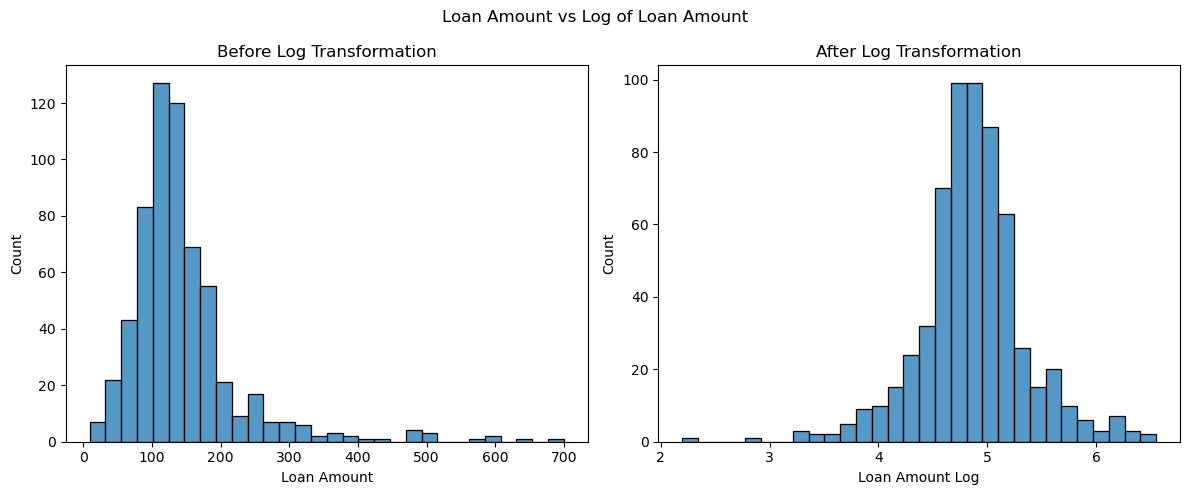

In [85]:
# Plot Loan Amount and Log Loan Amount
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Loan Amount vs Log of Loan Amount')

sns.histplot(x='LoanAmount', data=df_clean, bins=30, ax=ax[0])
ax[0].set(xlabel="Loan Amount", ylabel="Count")
ax[0].set_title('Before Log Transformation')

sns.histplot(x='LoanAmount_log', data=df_clean, bins=30, ax=ax[1])
ax[1].set(xlabel="Loan Amount Log", ylabel="Count")
ax[1].set_title('After Log Transformation')

plt.tight_layout()
plt.show()

Combine both incomes as total income and take a log transformation of the same.

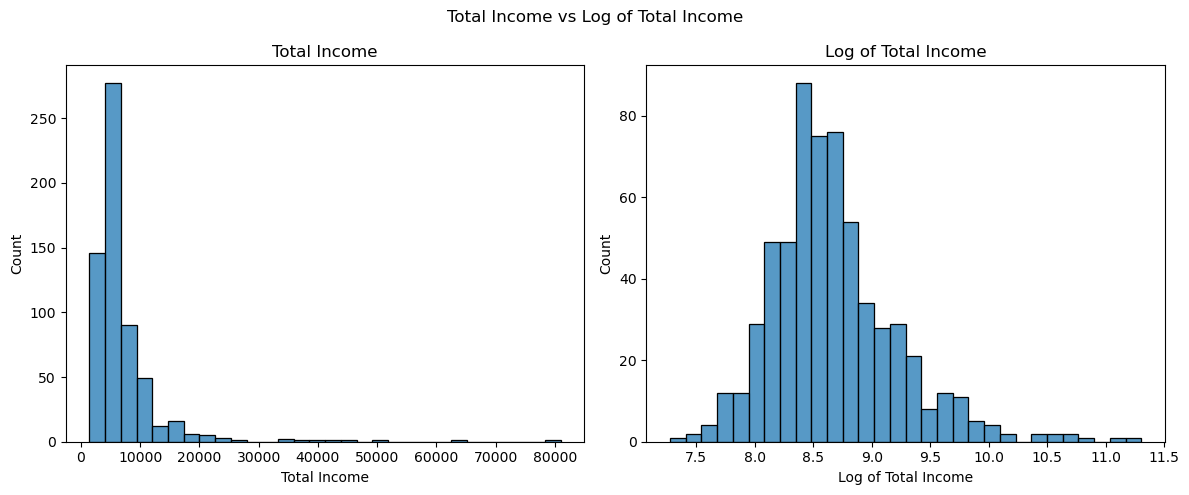

In [86]:
# Combine ApplicantIncome and CoapplicantIncome into TotalIncome
df_clean['TotalIncome'] = df_clean['ApplicantIncome'] + df_clean['CoapplicantIncome']

# Apply log transformation to TotalIncome
df_clean['TotalIncome_log'] = np.log(df_clean['TotalIncome'])

# Plot histogram of TotalIncome and TotalIncome_log
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Total Income vs Log of Total Income')

sns.histplot(x='TotalIncome', data=df_clean, bins=30, ax=ax[0])
ax[0].set(xlabel="Total Income", ylabel="Count")
ax[0].set_title('Total Income')

sns.histplot(x='TotalIncome_log', data=df_clean, bins=30, ax=ax[1])
ax[1].set(xlabel="Log of Total Income", ylabel="Count")
ax[1].set_title('Log of Total Income')

plt.tight_layout()
plt.show()

In [87]:
df_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

## 4. Building a Predictive Model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [89]:
df_clean.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [90]:
X = df_clean.drop('Loan_Status', axis=1)

df_clean['Loan_Status'] = df_clean['Loan_Status'].replace({'Y': 1, 'N': 0})

y = df_clean['Loan_Status']

In [91]:

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [92]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [93]:
X_categorical = pd.get_dummies(df_clean[categorical_cols])

X = pd.concat([X_categorical, X[numeric_cols]], axis=1)





In [94]:
X.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,TotalIncome,TotalIncome_log
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0.072991,-0.554487,0.000229,0.273231,0.250978,-0.182184,0.008468
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,0,-0.134412,-0.038732,-0.218743,0.273231,-0.019567,-0.144684,0.082903
2,1.0,0,1,0,1,1,0,0,0,1,...,0,0,1,-0.393747,-0.554487,-0.957044,0.273231,-1.354563,-0.623656,-1.217363
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,1,-0.462062,0.251980,-0.314008,0.273231,-0.149642,-0.322885,-0.301273
4,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0.097728,-0.554487,-0.063938,0.273231,0.175389,-0.158785,0.055266


In [95]:
X['Credit_History'] = X['Credit_History'].astype(int)

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#instantiate
lr = LogisticRegression(max_iter=1000)

# fit model to training data
lr.fit(X_train, y_train)

# make predictions on test data
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 78.38%
Precision: 83.15%
Recall: 70.29%
F1 score: 71.87%


/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_18252/3949020530.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cmn = cm/cm.astype(np.float).sum(axis=1)


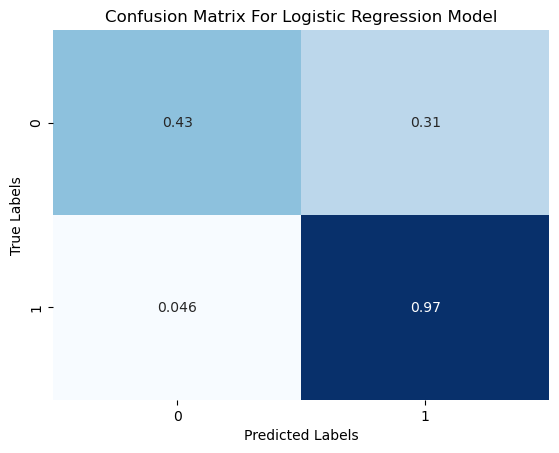

In [97]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# normalize confusion matrix
cmn = cm/cm.astype(np.float).sum(axis=1)

# create a heatmap of the confusion matrix
sns.heatmap(cmn, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix For Logistic Regression Model")
plt.show()

In [98]:
#instantiate
rfc = RandomForestClassifier()

# fit model to training data
rfc.fit(X_train,y_train)

# make predictions on test data
y_pred = rfc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 77.30%
Precision: 78.72%
Recall: 70.16%
F1 score: 71.58%


Try paramater grid search to improve the results

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8157865937072504


In [100]:

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 78.38%
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.72       185
weighted avg       0.81      0.78      0.76       185



## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [101]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the original DataFrame
df = pd.read_csv("../data.csv")  

# Data cleaning steps
df_clean = df.copy()

# Replace null values in 'Gender', 'Self_Employed', and 'Dependents' columns with mode
cols = ['Gender', 'Self_Employed', 'Dependents']
for col in cols:
    df_clean[col].fillna(df_clean[col].mode().iloc[0], inplace=True)

# Replace null values in 'Married' column based on 'CoapplicantIncome'
df_clean['Married'] = df_clean.apply(lambda row: 'No' if pd.isnull(row['Married']) and row['CoapplicantIncome'] == 0 else 'Yes' if pd.isnull(row['Married']) else row['Married'], axis=1)

# Calculate the median loan term for each loan amount category
median_loan_term_by_amount = df_clean.groupby('LoanAmount')['Loan_Amount_Term'].median()

# Fill the null values based on the loan amount
df_clean['Loan_Amount_Term'] = df_clean.apply(lambda row: median_loan_term_by_amount[row['LoanAmount']] if pd.isnull(row['Loan_Amount_Term']) else row['Loan_Amount_Term'], axis=1)

# Calculate the mean loan amount for each loan term category
mean_loan_amount_by_term = df_clean.groupby('Loan_Amount_Term')['LoanAmount'].mean()

# Fill the null values based on the loan term
df_clean['LoanAmount'] = df_clean.apply(lambda row: mean_loan_amount_by_term[row['Loan_Amount_Term']] if pd.isnull(row['LoanAmount']) else row['LoanAmount'], axis=1)

# Fill null values in 'Credit_History' column with mode
mode_credit_history = df_clean['Credit_History'].mode()[0]
df_clean['Credit_History'].fillna(mode_credit_history, inplace=True)

# Separate the features and target variable
X = df_clean.drop('Loan_Status', axis=1)
y = df_clean['Loan_Status'].replace({'Y': 1, 'N': 0})

# Define the numeric and categorical columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Create the preprocessing transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the hyperparameter grid
param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7837837837837838
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [102]:
# Save the trained model
with open('loan_prediction.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [103]:

with open('loan_prediction.pkl', 'rb') as file:
    loan_model = pickle.load(file)   
    
# Test predictions
predictions = loan_model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [112]:
'''import requests

json_data = {
    'Gender': 'Male',
    'Married': 'No',
    'Dependents': 0,
    'Education': 'Not Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 3691,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 110.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area': 'Rural'
}

URL = "http://172.31.95.201:5000/predict"
response = requests.post(url=URL, json=json_data)
predictions = response.json()['predictions']
print("Predictions:", predictions)'''

'import requests\n\njson_data = {\n    \'Gender\': \'Male\',\n    \'Married\': \'No\',\n    \'Dependents\': 0,\n    \'Education\': \'Not Graduate\',\n    \'Self_Employed\': \'No\',\n    \'ApplicantIncome\': 3691,\n    \'CoapplicantIncome\': 0.0,\n    \'LoanAmount\': 110.0,\n    \'Loan_Amount_Term\': 360.0,\n    \'Credit_History\': 1.0,\n    \'Property_Area\': \'Rural\'\n}\n\nURL = "http://172.31.95.201:5000/predict"\nresponse = requests.post(url=URL, json=json_data)\npredictions = response.json()[\'predictions\']\nprint("Predictions:", predictions)'